## ICE-12. Audio Features - 2
Please download the input dataset zip from the following link:<br>
https://drive.google.com/file/d/1O7paHG4kRekcUlCya4G5tfBZEjQRAkKm/view?usp=share_link <br><br>

# Question 1 

### Whats is Cepstrum ?

Cepstrum is what you get when the inverse Fourier transform is applied to the logarithm of a Fourier spectrum. It is used to look at the periodicity of a signal at certain frequencies. So one might convert a signal to a spectrum using a Fourier transform, and see that there is a peak at a certain frequency of sound. Applying a cepstrum transform at that frequency produces a signal (and therefore a plottable graph) of what is in the original audio at that frequency, viewable in time.

###**Tutorial**

- Download sample audio file
- Verify if its present
- import required libraries

In [206]:
!pip install torchaudio==0.12.1
!curl -O https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand3.wav
!ls CantinaBand3.wav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   300k      0 --:--:-- --:--:-- --:--:--  300k
CantinaBand3.wav


In [207]:
from matplotlib import pyplot as plt
from IPython import display

import torch
import torchaudio
from scipy.io import wavfile

import numpy as np
assert torch.__version__.startswith('1.12'), 'Please, install torch>=1.12'
assert torchaudio.__version__.startswith('0.12'), 'Please, install torchaudio>=0.12'

import os
import urllib.request
from librosa.effects import pitch_shift
from scipy import signal
import librosa
import librosa.display
import math

In [208]:
if not os.path.exists("CantinaBand3.wav"):
    urllib.request.urlretrieve("https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand3.wav", "CantinaBand3.wav")

In [209]:
if not os.path.exists("ICE 09 Pictures/"):
    ! gdown --folder https://drive.google.com/drive/folders/1Q5GaVUPs2UWv19UXhxqsFTlbS-mmnAcM?usp=sharing
    # shutil.move("ICE 10 Pictures/001.jpg", "001.jpg")

Retrieving folder list
Processing file 15JBJB9owpVO3DFE-1A-zpq6PEs-IJ6CW mini_speech_commands.zip
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=15JBJB9owpVO3DFE-1A-zpq6PEs-IJ6CW
To: /content/ICE 12 Files/mini_speech_commands.zip
100% 182M/182M [00:00<00:00, 246MB/s]
Download completed


## Task 1

- Visualize above audio file  (x axis : time, y axis : amplitude)
- Apply  pitch shifting and visualize again


In [210]:
# Load file
sample_rate, audio_data = wavfile.read("CantinaBand3.wav")
audio_data = audio_data.astype("float32")

In [211]:
# Display function
def plot_waveform(audio, sr):

    # Values
    plt.plot(audio)

    # Labels
    plt.title("Waveform")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    # yrange
    plt.ylim(-10000, 10000)

    plt.show()

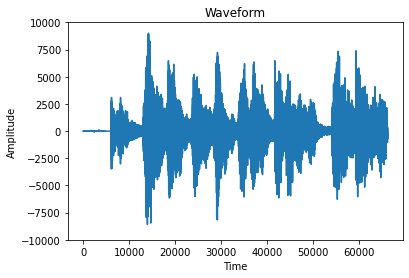

In [212]:
# Display basic
plot_waveform(audio_data, sample_rate)

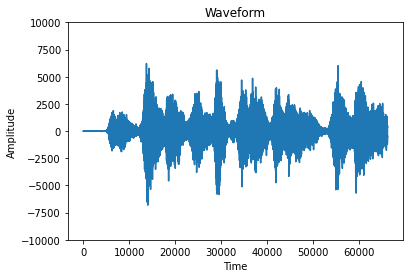

In [213]:
# Plot shifted waveform
shifted_audio = pitch_shift(audio_data, sample_rate, 10)
plot_waveform(shifted_audio, sample_rate)

## Task 2

### Use Hann window and plot the following
- Raw Audio  (x axis - Time , Y axis - amplitude )
- Windowed Audio (x axis - Time , Y axis - amplitude )
- Spectrogram of Raw Audio (Frequency plot)
- Spectrogram of Windowed Audio (Frequency plot)


In [214]:
# Hann window of the entire audio
window = signal.hann(len(audio_data))
audio_data_windowed = audio_data * window
audio_data_windowed

array([ 0.00000000e+00,  1.57888762e-08,  0.00000000e+00, ...,
       -1.08266579e-07, -9.63121449e-07, -0.00000000e+00])

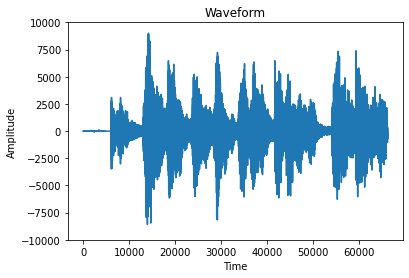

In [215]:
# Raw audio plot
plot_waveform(audio_data, sample_rate)

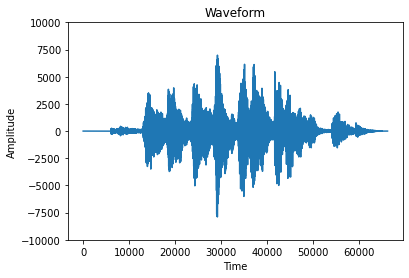

In [216]:
# Windowed audio plot
plot_waveform(audio_data_windowed, sample_rate)

In [217]:
a = audio_data.shape[0]
ss = a / ((a / sample_rate) * 2)

In [218]:
def plot_specgram(audio, ss):
    f, t, s = signal.spectrogram(audio, ss)
    plt.pcolormesh(t, f, s, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

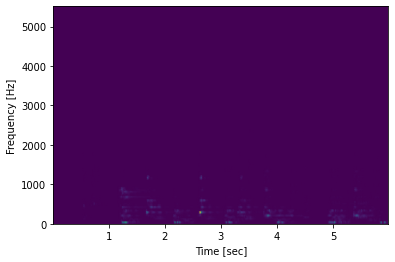

In [219]:
# Spectrogram of raw audio
plot_specgram(audio_data, ss)

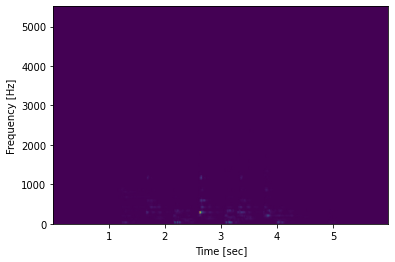

In [220]:
# Spectrogram of windowed audio
plot_specgram(audio_data_windowed, ss)

## Task 3

Use STFT and display spectogram for the above audio

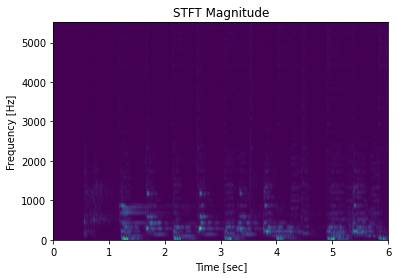

In [221]:
# STFT of the entire audio
f, t, z = signal.stft(audio_data, ss)

# Plot
plt.pcolormesh(t, f, np.abs(z), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


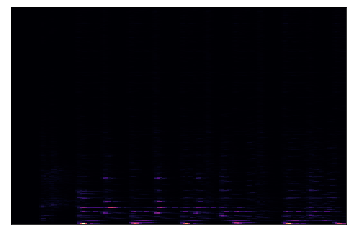

In [222]:
# Using librosa
s_gram_stft = librosa.stft(audio_data)
librosa.display.specshow(s_gram_stft)

## Task 4

- Use Mel scale and apply it to above spectogram of Task 3 and plot it (x axis - Hertz scale  , y-axis - Mels scale )

- Display Mels spectrogram (x - time , y - Mels)

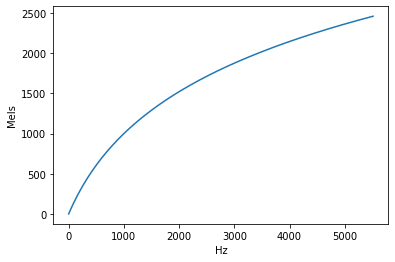

In [223]:
# Convert task 3's frequencies to mel scale

def hz_to_mel(f):
    return 2595 * math.log10(1 + (f / 700.0))

d = [hz_to_mel(x) for x in f]
plt.plot(f, d)
plt.xlabel("Hz")
plt.ylabel("Mels")
plt.show()

/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


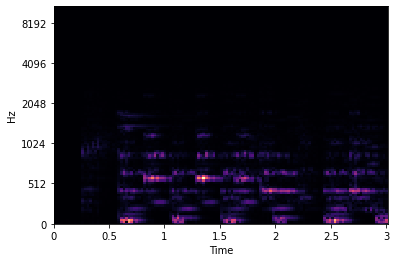

In [224]:
# Mel scale
mag, phase = librosa.magphase(s_gram_stft)
s_gram_mel = librosa.feature.melspectrogram(S=s_gram_stft, sr=sample_rate)
librosa.display.specshow(s_gram_mel, x_axis='time', y_axis='mel')

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


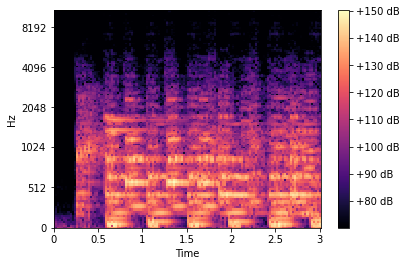

In [225]:
# convert to decible scale
s_gram_mel_db = librosa.amplitude_to_db(s_gram_mel, ref=np.min)
librosa.display.specshow(s_gram_mel_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')